# Model Evaluation
RMSE and R<sup>2</sup> results of the ML algorithm&preprocessing combinations are compared in heatmaps. 

ML algorithms used in this thesis are:
- CNN: Convolutional Neural Network
- KNN: K-Nearest Neighbor Regressor
- Kernel Ridge: Kernel Ridge Regressor (polynomial kernel)
- PLS: Partial Least Squares Regressor
- Random Forest: Random Forest Regressor
- XGBoost: Extreme Gradient Boosting Regressor
- LSSVM: Least Squares Support Vector Machine Regressor

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import json
import seaborn as sns
import sys
# Needed for Python to find the util modules
sys.path.insert(0, "src")
sys.path.insert(0, "..")
import util.m06_model_plotting as plot_util
import util.m00_general_util as util

In [4]:
print(os.getcwd())
#os.chdir("..\..")

C:\Users\sebne\OneDrive\Documents\FHWN_Tulln\DataAnalysis\repo


In [26]:
# Combining JSON files into one
my_files = ["temp/model_evaluation/model_output_kernel_ridge_poly_nir.json", 
            "temp/model_evaluation/model_output_knn_nir.json", 
            "temp/model_evaluation/model_output_rf_nir.json",
            "temp/model_evaluation/model_output_pls_nir.json", 
            "temp/model_evaluation/model_output_xgb_nir.json",
            "temp/model_evaluation/model_output_cnn_2layer2_nir.json",
            "temp/model_evaluation/model_output_lssvm_poly_nir.json",
         ]
util.merge_json_files(my_files, output_file="model_output_nir.json")

In [47]:
# Combining JSON files into one
my_files = ["temp/MIR_results/model_output_knn_krp_mir.json", 
            "temp/MIR_results/model_output_lssvm_pls_mir.json",
            "temp/MIR_results/model_output_cnn_mir.json",
            "temp/MIR_results/model_output_xgb_mir.json",
            "temp/MIR_results/model_output_rf_mir.json"
         ]
util.merge_json_files(my_files, output_file="model_output_mir.json")

In [9]:
def show_train_test_heatmap_old(model_results, title, left_metric = "Test_R2", right_metric = "Train_R2", cmap = "YlGnBu"):
    pivot = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    ax1, ax2 = axes
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax1)
    ax1.set_title(f"{title} - {left_metric}")
    pivot = plot_util.create_model_performance_pivot(model_results, metric=right_metric)
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax2)
    ax2.set_title(f"{title} - {right_metric}")
    plt.show()

In [10]:
def show_train_test_heatmap(model_results, title, left_metric="Test_R2", right_metric="Train_R2", cmap="YlGnBu"):
    # Create pivots for heatmaps
    pivot_left = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    pivot_right = plot_util.create_model_performance_pivot(model_results, metric=right_metric)

    # Determine the global min and max for color scaling
    vmin = min(pivot_left.min().min(), pivot_right.min().min())
    vmax = max(pivot_left.max().max(), pivot_right.max().max())

    # Set figure size dynamically based on the pivot table shape
    rows, cols = pivot_left.shape
    fig_size = (cols * 1.5, rows * 1.5)  # Adjust scaling factor as needed

    # Create figure and axes for heatmaps
    fig, axes = plt.subplots(1, 2, figsize=fig_size, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.3})
    ax1, ax2 = axes

    # Create the heatmaps with shared vmin/vmax and smaller font size
    sns.heatmap(pivot_left, cmap=cmap, annot=True, fmt=".3f", ax=ax1, vmin=vmin, vmax=vmax, cbar=False, 
                square=True, annot_kws={"size": 10})  # Adjust annotation font size
    ax1.set_title(f"{title} - {left_metric}", fontsize=10)  # Adjust title font size
    ax1.set_aspect("equal")  
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=8)  # Adjust x-axis label size
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)  # Adjust y-axis label size

    # Adjust the colorbar size to match the heatmap
    cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [left, bottom, width, height]
    
    sns.heatmap(pivot_right, cmap=cmap, annot=True, fmt=".3f", ax=ax2, vmin=vmin, vmax=vmax, cbar=True, 
                cbar_ax=cbar_ax, square=True, annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})  
    ax2.set_title(f"{title} - {right_metric}", fontsize=10)  
    ax2.set_aspect("equal")  
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=8)  
    ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=8)  

    # Adjust colorbar font size
    cbar_ax.tick_params(labelsize=10)  

    # Show the plot
    plt.show()


In [51]:
def show_single_heatmap(model_results, title, metric="Test_R2", cmap="YlGnBu"):
    # Create pivots for heatmaps
    pivot = plot_util.create_model_performance_pivot(model_results, metric=metric)

    fig, axes = plt.subplots(figsize=(15,6))
    rows, cols = pivot.shape
    fig_size = (cols * 2, rows * 2)  

    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", cbar=True, 
                square=True, annot_kws={"size": 10},vmin=0.65, vmax=1)  # Adjust annotation font size
    axes.set_title(f"{title} - {metric}", fontsize=10)  # Adjust title font size
    axes.set_aspect("equal")  
    axes.set_xlabel("pre-processing")  # Adjust title font size
    axes.set_xticklabels(axes.get_xticklabels(), fontsize=8)  # Adjust x-axis label size
    axes.set_yticklabels(axes.get_yticklabels(), fontsize=8)  # Adjust y-axis label size

    plt.show()

In [28]:
def clean_output_json(path):
    with open(path, "r") as f:
        data = json.load(f)
    
    # Filter out unnecessary entries 
    filtered_data = pd.DataFrame(data)
    filtered_data = filtered_data[ (filtered_data["baseline_corr"] != "detrend3")]
    filtered_data["baseline_corr"] = filtered_data["baseline_corr"].replace({
        "detrendsnv": "detrend_snv",
        "snvsavgol": "snv_savgol"
    })
    return filtered_data

In [48]:
#model_output_nir = pd.read_json("temp/model_evaluation/model_output_nir.json")
model_output_nir = clean_output_json("temp/model_evaluation/model_output_nir.json")
model_output_mir = clean_output_json("temp/MIR_results/model_output_mir.json")

## RMSE Heatmaps - NIR

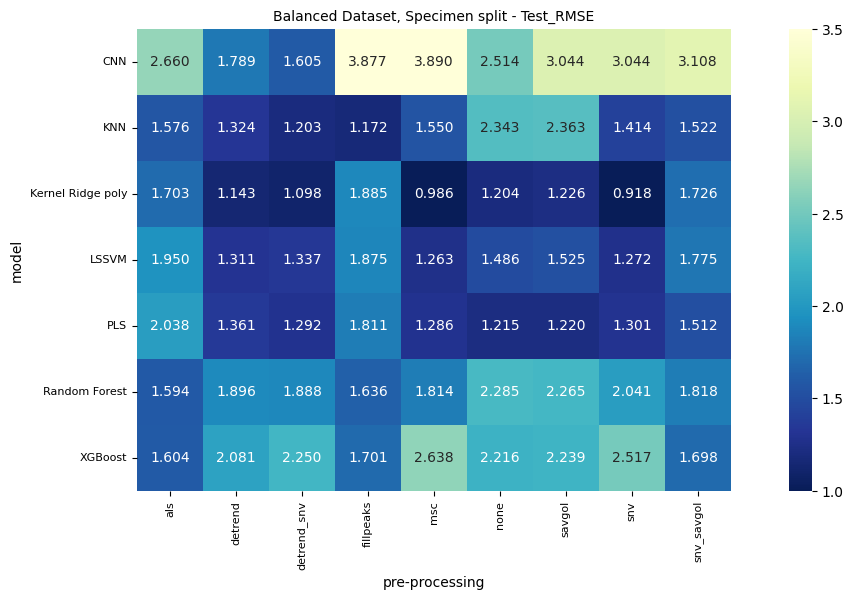

In [33]:
show_single_heatmap(model_output_nir, title="Balanced Dataset, Specimen split", metric="Test_RMSE", cmap="YlGnBu_r")

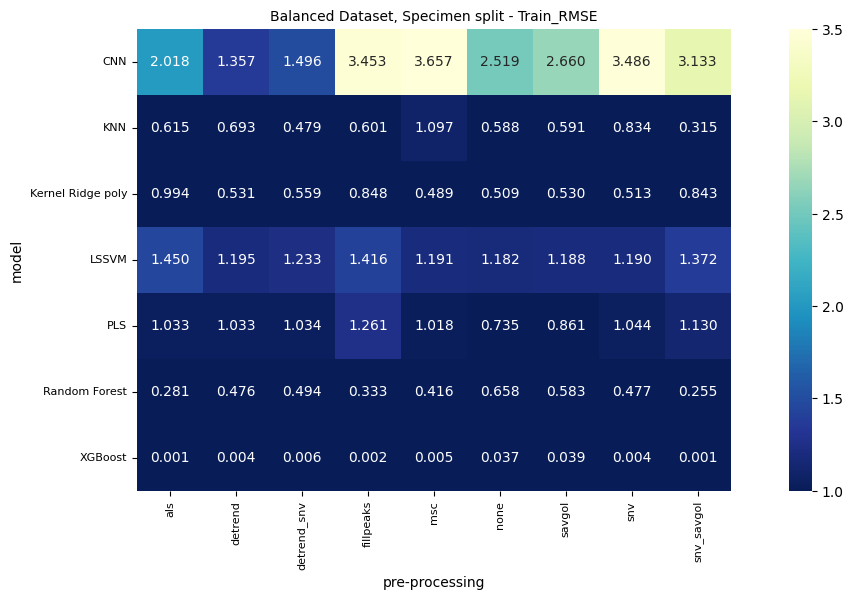

In [34]:
show_single_heatmap(model_output_nir, title="Balanced Dataset, Specimen split", metric="Train_RMSE", cmap="YlGnBu_r")

## R<sup>2</sup> Heatmaps - NIR

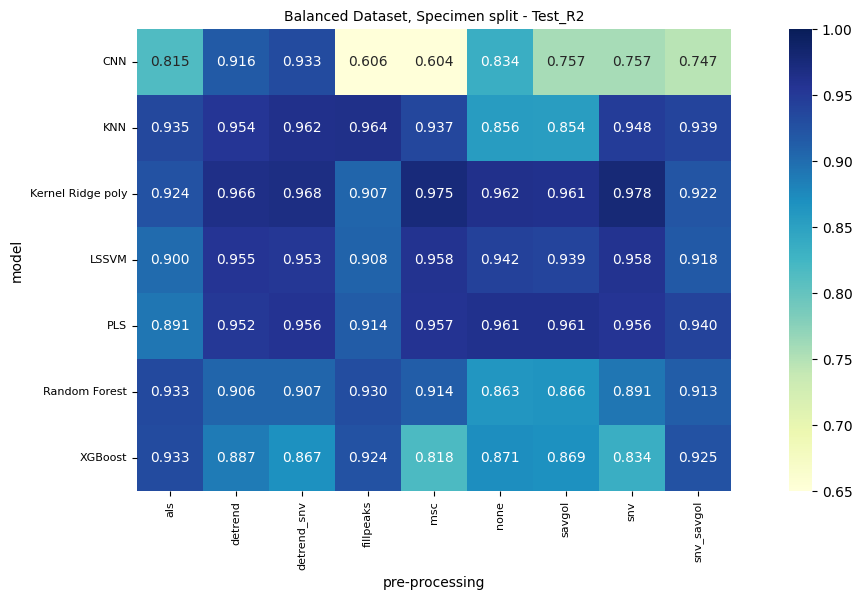

In [45]:
show_single_heatmap(model_output_nir, title="Balanced Dataset, Specimen split", metric="Test_R2", cmap="YlGnBu")

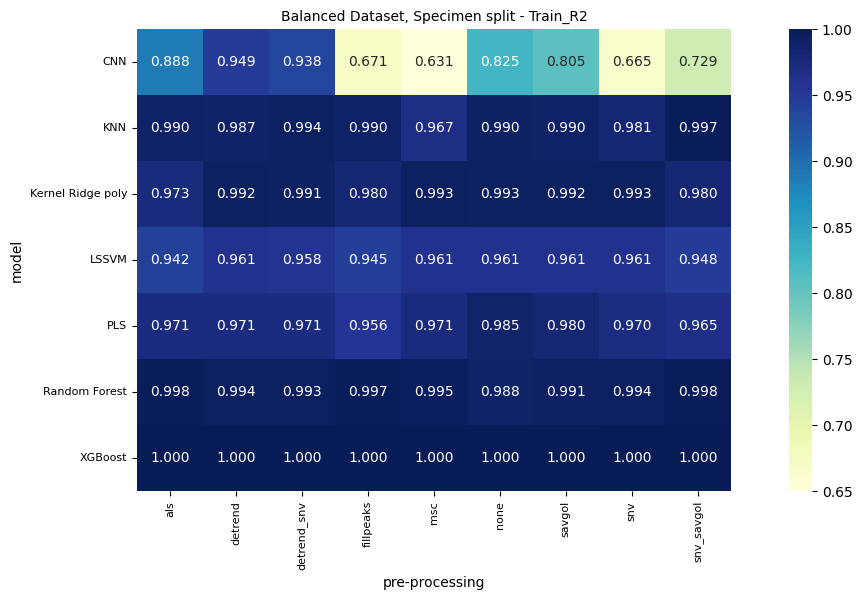

In [46]:
show_single_heatmap(model_output_nir, title="Balanced Dataset, Specimen split", metric="Train_R2", cmap="YlGnBu")

## RMSE Heatmaps - MIR


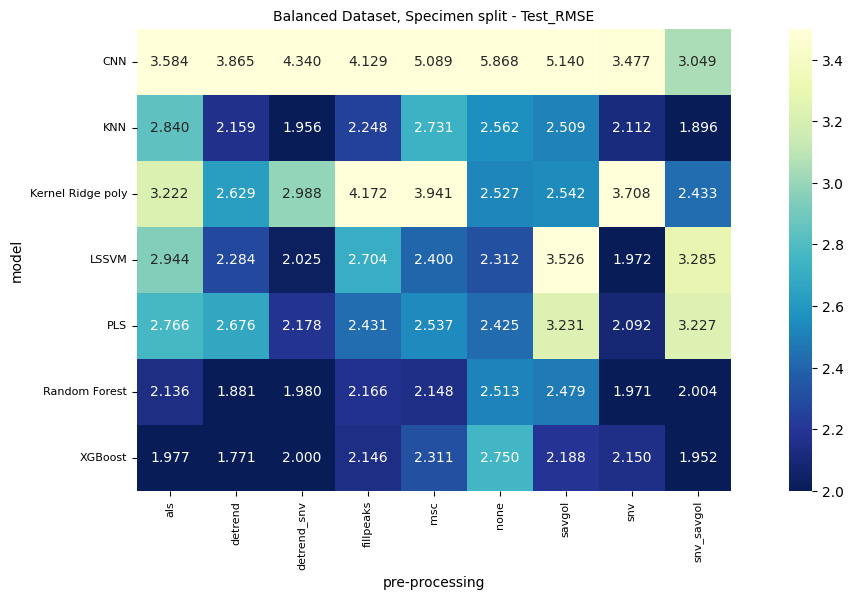

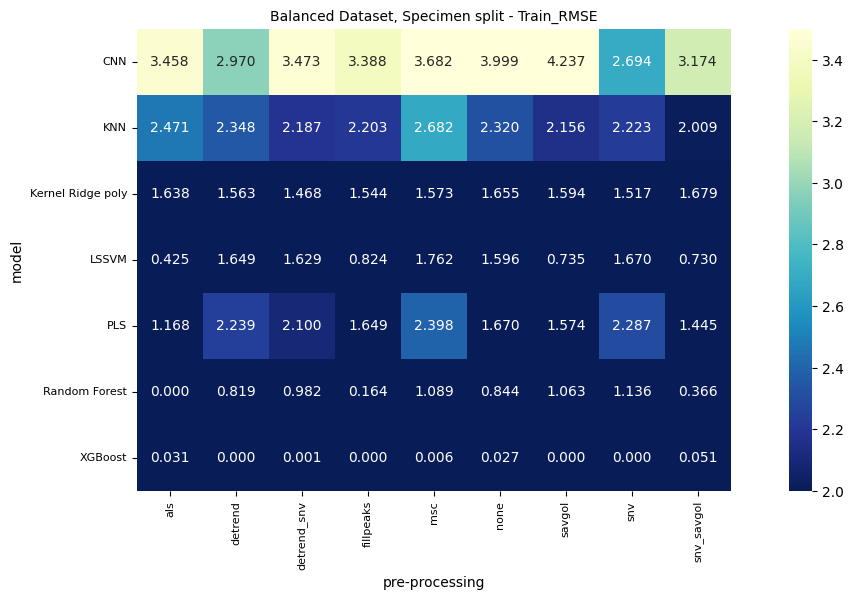

In [50]:
show_single_heatmap(model_output_mir, title="Balanced Dataset, Specimen split", metric="Test_RMSE", cmap="YlGnBu_r")
show_single_heatmap(model_output_mir, title="Balanced Dataset, Specimen split", metric="Train_RMSE", cmap="YlGnBu_r")

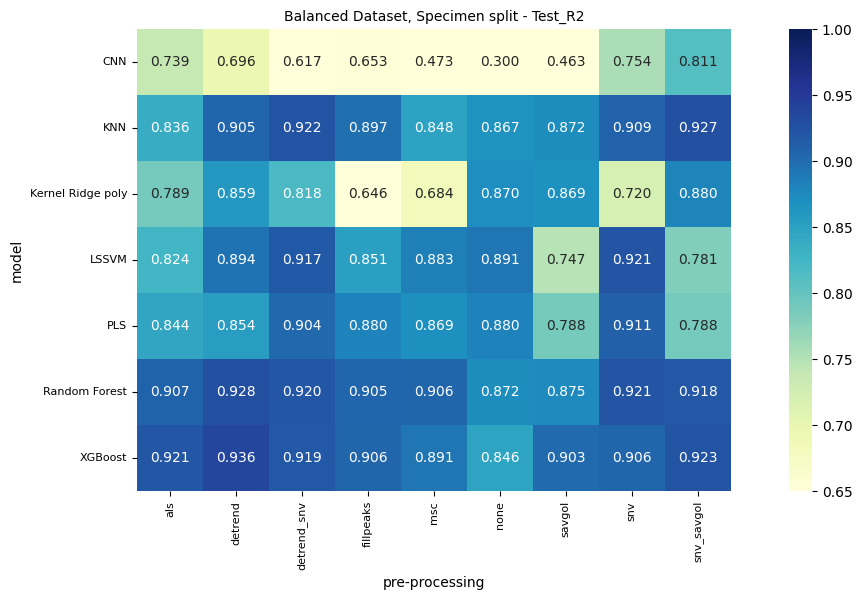

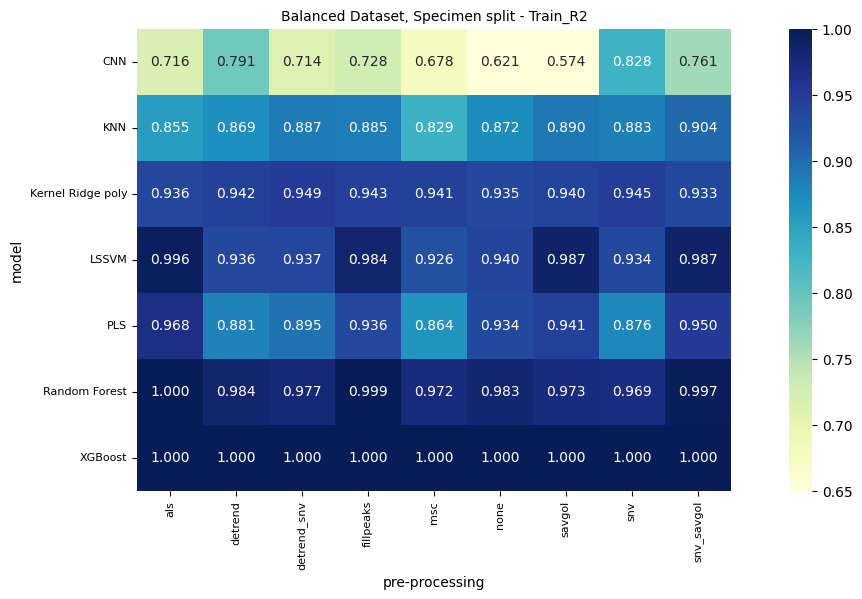

In [52]:
show_single_heatmap(model_output_mir, title="Balanced Dataset, Specimen split", metric="Test_R2", cmap="YlGnBu")
show_single_heatmap(model_output_mir, title="Balanced Dataset, Specimen split", metric="Train_R2", cmap="YlGnBu")

In [1]:
#balanced_specimen = pd.read_json("../../temp/spectra_treated/nir/balanced/model_output_balanced_scaling.json")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

#balanced_specimen = pd.read_json("../../temp/spectra_treated/nir/balanced/pls_xgb_model_output_balanced_scaling.json")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split")
#show_train_test_heatmap(balanced_specimen, "Balanced Model_new, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")